In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import plotly.offline as py


In [2]:
df = pd.read_csv("world-data-2023.csv")

In [3]:
df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [4]:
print(f"Summary Of The Dataset with numerical columns :")
df.describe().style.set_properties(**{"background-color": "#121d6b","color":"#e9c46a","border": "1.5px solid black"})

Summary Of The Dataset with numerical columns :


,Birth Rate,Calling Code,Fertility Rate,Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Latitude,Longitude
count,189.000000,194.000000,188.000000,189.000000,187.000000,181.000000,188.000000,194.000000,194.000000
mean,20.214974,360.546392,2.698138,21.332804,72.279679,160.392265,1.839840,19.092351,20.232434
std,9.945774,323.236419,1.282267,19.548058,7.483661,233.502024,1.684261,23.961779,66.716110
min,5.900000,1.000000,0.980000,1.400000,52.800000,2.000000,0.010000,-40.900557,-175.198242
25%,11.300000,82.500000,1.705000,6.000000,67.000000,13.000000,0.332500,4.544175,-7.941496
50%,17.950000,255.500000,2.245000,14.000000,73.200000,53.000000,1.460000,17.273849,20.972652
75%,28.750000,506.750000,3.597500,32.700000,77.500000,186.000000,2.935000,40.124603,48.281523
max,46.080000,1876.000000,6.910000,84.500000,85.400000,1150.000000,8.420000,64.963051,178.065032


# DATA EKSPORATION


In [5]:
def clean_data(df):
    column_mapping = {
        'Density\n(P/Km2)': 'Density',
        'Abbreviation': 'Country Code',
        'Land Area(Km2)': 'Land Area',
        'Birth Rate': 'Birth Rate',
        'Capital/Major City': 'Capital',
        'Co2-Emissions': 'CO2 Emissions',
        'CPI': 'CPI',
        'Currency-Code': 'Currency Code',
        'Gasoline Price': 'Gasoline Price',
        'GDP': 'GDP',
        'Largest city': 'Largest City',
        'Minimum wage': 'Minimum Wage',
        'Population': 'Population',
        'Latitude': 'Latitude',
        'Longitude': 'Longitude'
    }
    df = df.rename(columns=column_mapping)

    numeric_columns = ['Density','Land Area', 'Birth Rate', 'CO2 Emissions', 'CPI', 'Gasoline Price', 'GDP', 'Minimum Wage', 'Population', 'Latitude', 'Longitude']
    df[numeric_columns] = df[numeric_columns].replace({',': '', '\$': '', '%': ''}, regex=True)
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)
    
    for column in numeric_columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            df[column] = df[column].astype(float)
            
        elif pd.api.types.is_string_dtype(df[column]):
           df[column] = df[column].str.replace(',', '').astype(float)
    
    # Clean up text columns
    text_columns = ['Country', 'Capital', 'Currency Code', 'Largest City']
    df[text_columns] = df[text_columns].apply(lambda x: x.str.strip())
    
    percentage_columns = ['Agricultural Land( %)', 'Population: Labor force participation (%)',
                      'Tax revenue (%)', 'Total tax rate', 'Unemployment rate','Gross primary education enrollment (%)','Forested Area (%)','Gross tertiary education enrollment (%)']
    for column in percentage_columns:
           df[column] = df[column].apply(lambda x: float(x.rstrip('%')) if isinstance(x, str) else x) 
    
    return df    

df_clean = clean_data(df.copy())
df_clean.head()
    
    
    

,Country,Density,Country Code,Agricultural Land( %),Land Area,Armed Forces size,Birth Rate,Calling Code,Capital,CO2 Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60.0,AF,58.1,652230.0,"323,000",32.49,93.0,Kabul,8672.0,...,78.40%,0.28,38041754.0,48.9,9.3,71.4,11.12,"9,797,273",33.939110,67.709953
1,Albania,105.0,AL,43.1,28748.0,"9,000",11.78,355.0,Tirana,4536.0,...,56.90%,1.20,2854191.0,55.7,18.6,36.6,12.33,"1,747,593",41.153332,20.168331
2,Algeria,18.0,DZ,17.4,2381741.0,"317,000",24.28,213.0,Algiers,150006.0,...,28.10%,1.72,43053054.0,41.2,37.2,66.1,11.70,"31,510,100",28.033886,1.659626
3,Andorra,164.0,AD,40.0,468.0,NaN,7.20,376.0,Andorra la Vella,469.0,...,36.40%,3.33,77142.0,NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26.0,AO,47.5,1246700.0,"117,000",40.73,244.0,Luanda,34693.0,...,33.40%,0.21,31825295.0,77.5,9.2,49.1,6.89,"21,061,025",-11.202692,17.873887


In [6]:
df_clean.columns

Index(['Country', 'Density', 'Country Code', 'Agricultural Land( %)',
       'Land Area', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital', 'CO2 Emissions', 'CPI', 'CPI Change (%)', 'Currency Code',
       'Fertility Rate', 'Forested Area (%)', 'Gasoline Price', 'GDP',
       'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest City', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum Wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [7]:
print(f"Summary Of The Dataset with numerical columns :")
df_clean.describe().style.set_properties(**{"background-color": "#121d6b","color":"#e9c46a","border": "1.5px solid black"})

Summary Of The Dataset with numerical columns :


,Density,Agricultural Land( %),Land Area,Birth Rate,Calling Code,CO2 Emissions,CPI,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum Wage,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Latitude,Longitude
count,195.000000,188.000000,194.000000,189.000000,194.000000,188.000000,178.000000,188.000000,188.000000,175.000000,193.000000,188.000000,183.000000,189.000000,187.000000,181.000000,150.000000,188.000000,194.000000,176.000000,169.000000,183.000000,176.000000,194.000000,194.000000
mean,356.764103,39.117553,689624.365979,20.214974,360.546392,177799.239362,190.460955,2.698138,32.015426,1.002457,477295901399.538879,102.470213,37.963388,21.332804,72.279679,160.392265,2.194133,1.839840,39381164.010309,62.738068,16.573964,40.822404,6.886364,19.092351,20.232434
std,1982.888967,21.783052,1921609.228880,9.945774,323.236419,838790.268386,397.947380,1.282267,23.791331,0.368858,2172173359474.052979,13.151607,29.261022,19.548058,7.483661,233.502024,2.970796,1.684261,145092391.512999,10.502907,6.961632,20.557662,5.079216,23.961779,66.716110
min,2.000000,0.600000,0.000000,5.900000,1.000000,11.000000,99.030000,0.980000,0.000000,0.000000,47271463.000000,23.400000,0.800000,1.400000,52.800000,2.000000,0.010000,0.010000,836.000000,38.000000,0.000000,8.000000,0.090000,-40.900557,-175.198242
25%,35.500000,21.700000,23828.250000,11.300000,82.500000,2304.250000,113.885000,1.705000,11.000000,0.755000,8454619608.000000,98.950000,12.150000,6.000000,67.000000,13.000000,0.402500,0.332500,1962678.000000,56.150000,11.700000,30.600000,3.395000,4.544175,-7.941496
50%,89.000000,39.600000,119511.000000,17.950000,255.500000,12303.000000,125.340000,2.245000,32.000000,0.980000,34387229486.000000,102.550000,31.200000,14.000000,73.200000,53.000000,1.045000,1.460000,8826588.000000,62.450000,16.300000,37.200000,5.360000,17.273849,20.972652
75%,216.500000,55.375000,524256.000000,28.750000,506.750000,63884.250000,157.265000,3.597500,48.175000,1.240000,234094042939.000000,108.025000,63.150000,32.700000,77.500000,186.000000,2.447500,2.935000,28585489.750000,69.500000,21.100000,48.000000,9.490000,40.124603,48.281523
max,26337.000000,82.600000,17098240.000000,46.080000,1876.000000,9893038.000000,4583.710000,6.910000,98.300000,2.000000,21427700000000.000000,142.500000,136.600000,84.500000,85.400000,1150.000000,13.590000,8.420000,1397715000.000000,86.800000,37.200000,219.600000,28.180000,64.963051,178.065032


In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density                                    195 non-null    float64
 2   Country Code                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    float64
 4   Land Area                                  194 non-null    float64
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital                                    192 non-null    object 
 9   CO2 Emissions                              188 non-null    float64
 10  CPI                       

# VISUALIZATION

Analyze population density and land area to study spatial distribution patterns.

In [9]:
import plotly.express as px
import pandas as pd


# Filter the columns 'Density', 'Land Area', and 'Country'
df_filtered = df_clean[['Density', 'Land Area', 'Country']]

# Remove rows with missing values, if any
df_filtered = df_filtered.dropna()

# Create a scatter plot using population density and land area
fig = px.scatter(df_filtered, x='Land Area', y='Density', log_x=True, log_y=True, 
                 hover_name='Country', title='Population Density vs. Land Area')

# Set axis labels
fig.update_xaxes(title_text='Land Area (log scale)')
fig.update_yaxes(title_text='Population Density (log scale)')

# Show the scatter plot
fig.show()


Investigate the relationship between agricultural land and food security.

In [10]:

# Assuming you have a dataframe named 'df_clean' with the relevant columns
df_clean['Agriculture Land'] = (df_clean["Agricultural Land( %)"] / 100 * df_clean["Land Area"])

# Filter the relevant columns for analysis
df_filtered = df_clean[['Country', 'Agriculture Land']]

# Remove rows with missing values, if any
df_filtered = df_filtered.dropna()

# Create a choropleth map to visualize the relationship
fig = px.choropleth(df_filtered,
                    locations='Country',
                    locationmode='country names',
                    color='Agriculture Land',
                    hover_name='Country',
                    title='Agriculture Land by Country')

# Set axis labels
fig.update_geos(showcountries=True, countrycolor="black")
fig.update_coloraxes(colorbar_title="Agriculture Land")
fig.update_layout(geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'))

# Show the map
fig.show()


Examine carbon dioxide emissions and their impact on climate change.

In [11]:


df_clean['Carbon Dioxide Emission'] = df_clean["Forested Area (%)"] / 100 * df_clean["CO2 Emissions"]

df_filtered = df_clean[['Country', 'Carbon Dioxide Emission']]

df_filtered = df_filtered.dropna()


fig = px.choropleth(df_filtered,
                    locations='Country',
                    locationmode='country names',
                    color='Carbon Dioxide Emission',
                    hover_name='Country',
                    title='Carbon Dioxide Emissions by Country',
                    color_continuous_scale='YlOrRd')

# Set axis labels
fig.update_layout(geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'))

# Show the choropleth map
fig.show()


Explore correlations between economic indicators such as GDP and various socio-economic factors.

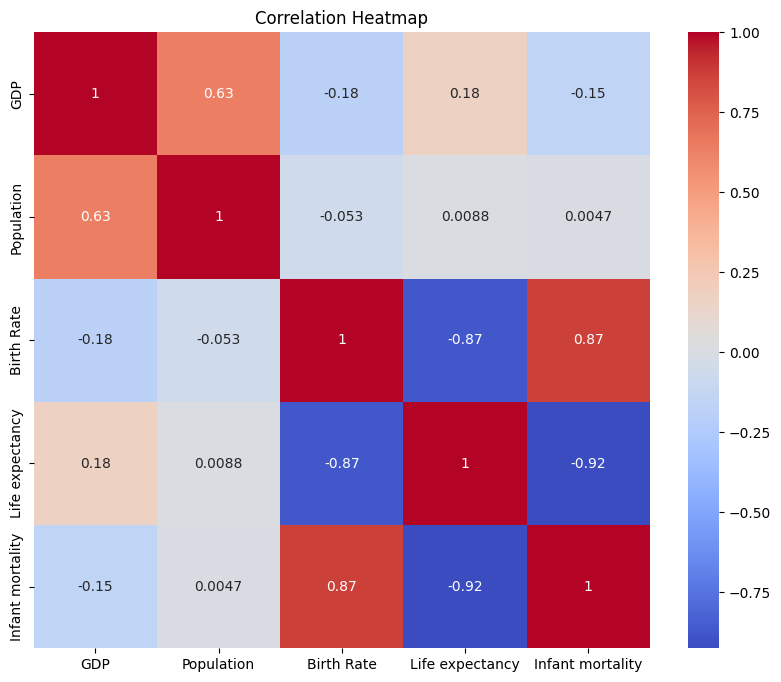

In [12]:
correlations_colums = ['GDP', 'Population', 'Birth Rate', 'Life expectancy', 'Infant mortality']
subset_data = df_clean[correlations_colums]
correlation_matrix = subset_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

Investigate educational enrollment rates and their implications for human capital development.

In [15]:
import plotly.graph_objects as go

top_10_countries = df_clean.nlargest(10, 'Gross primary education enrollment (%)')

y_GPEN = top_10_countries['Gross primary education enrollment (%)']
y_GTEE = top_10_countries['Gross tertiary education enrollment (%)']
x = top_10_countries['Country']


fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.01, subplot_titles=("Gross Primary Education Enrollment",
                                                                            "Gross Tertiary Education Enrollment"))

fig.add_trace(go.Pie(
    labels=x,
    values=y_GPEN,
    name='Gross Primary Education Enrollment',
    marker=dict(
        colors=['rgba(50, 171, 96, 0.6)', 'rgba(50, 171, 96, 0.7)', 'rgba(50, 171, 96, 0.8)', 'rgba(50, 171, 96, 0.9)',
                'rgba(50, 171, 96, 1.0)', 'rgba(50, 171, 96, 0.5)', 'rgba(50, 171, 96, 0.4)', 'rgba(50, 171, 96, 0.3)',
                'rgba(50, 171, 96, 0.2)', 'rgba(50, 171, 96, 0.1)']
    ),
    hole=0.3
), 1, 1)

fig.add_trace(go.Pie(
    labels=x,
    values=y_GTEE,
    name='Gross Tertiary Education Enrollment',
    marker=dict(
        colors=['rgba(128, 0, 128, 0.6)', 'rgba(128, 0, 128, 0.7)', 'rgba(128, 0, 128, 0.8)', 'rgba(128, 0, 128, 0.9)',
                'rgba(128, 0, 128, 1.0)', 'rgba(128, 0, 128, 0.5)', 'rgba(128, 0, 128, 0.4)', 'rgba(128, 0, 128, 0.3)',
                'rgba(128, 0, 128, 0.2)', 'rgba(128, 0, 128, 0.1)']
    ),
    hole=0.3
), 1, 2)

fig.update_layout(
    title='Top 10 Countries - Educational Enrollment Rates',
    legend=dict(x=0.029, y=1.038, font_size=12),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

fig.show()
